In [59]:
#################################
#    Regresion lineal ventas    #
#################################

import pandas
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('datasets/tvmarketing.csv')
df.head(5)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


<function matplotlib.pyplot.show(close=None, block=None)>

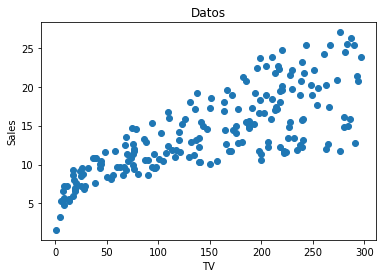

In [60]:
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Datos')
plt.show

In [61]:
# Establecer entrenamiento
frac = 0.7 # 70% de datos para el training
datos_train = df.sample(frac=frac, random_state=42)
datos_train.head(10)

,TV,Sales
95,163.3,16.9
15,195.4,22.4
30,292.9,21.4
158,11.7,7.3
128,220.3,24.7
115,75.1,12.6
69,216.8,22.3
170,50.0,8.4
174,222.4,11.5
45,175.1,14.9


In [62]:
datos_test = df[~df.index.isin(datos_train.index)]
datos_test.head(10)

,TV,Sales
1,44.5,10.4
7,120.2,13.2
8,8.6,4.8
13,97.5,9.7
14,204.1,19.0
17,281.4,24.4
20,218.4,18.0
21,237.4,12.5
34,95.7,9.5
37,74.7,14.7


In [63]:
X = np.array(datos_train['TV'])
Y = np.array(datos_train['Sales'])

X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

In [64]:
# Calculo del coeficiente
beta1 = float(np.linalg.inv(X.T@X)@X.T@Y)
beta1

0.08434643634073233

In [65]:
beta0 = float(Y.mean() - beta1*X.mean())
beta0

1.8159831211794586

In [66]:
# Grafica de la recta de regresión ajustada
u = np.linspace(0,300)
v = beta0 + beta1*u

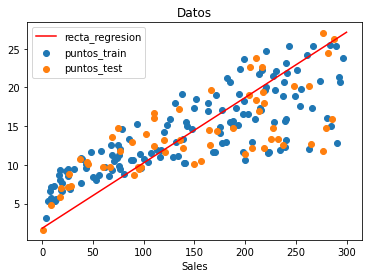

In [67]:
plt.plot(u,v,'r',label='recta_regresion')
plt.scatter(datos_train['TV'], datos_train['Sales'], label='puntos_train')
plt.scatter(datos_test['TV'], datos_test['Sales'], label='puntos_test')
plt.xlabel('TV')
plt.xlabel('Sales')
plt.title('Datos')
plt.legend()
plt.show()

In [68]:
# Prediccion y error
def prediccion(val):
    return beta0 + beta1*val

predicho  = prediccion(datos_test['TV'])
resultado = {'valor_real':datos_test['Sales'], 'prediccion':predicho}

R = pd.DataFrame(data=resultado)
R.head(10)

,valor_real,prediccion
1,10.4,5.569400
7,13.2,11.954425
8,4.8,2.541362
13,9.7,10.039761
14,19.0,19.031091
17,24.4,25.551070
20,18.0,20.237245
21,12.5,21.839827
34,9.5,9.887937
37,14.7,8.116662


In [69]:
def error(real, pred):
    return np.sum((real-pred)**2)/len(real)

In [70]:
error_cuadratico = error(R['valor_real'],R['prediccion'])
print('ECM = {:3f}'.format(error_cuadratico))

ECM = 24.077541


In [71]:
##########################################################################################
#   Estimacion de los coeficientes de la anterior regresion lineal usando sci-kit learn  #
##########################################################################################
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X,Y)

LinearRegression()

In [72]:
print('beta0 = {:3f}'.format(float(modelo.coef_)))

beta0 = 0.048756


In [73]:
print('beta1 = {:3f}'.format(float(modelo.intercept_)))

beta1 = 6.998637


In [74]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

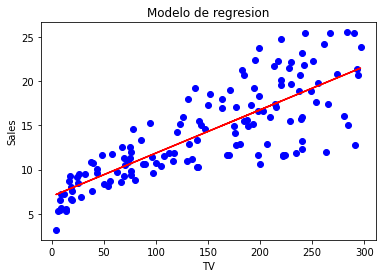

In [75]:
lin_regplot(X, Y, modelo)
plt.title('Modelo de regresion')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [76]:
X_test = np.array(datos_test['TV'])
X_test = X_test[:,np.newaxis]

In [77]:
prediccion = modelo.predict(X_test)

In [78]:
resultado = {'valor_real':datos_test['Sales'], 'prediccion':predicho}

R = pd.DataFrame(data=resultado)
R.head(10)

,valor_real,prediccion
1,10.4,5.569400
7,13.2,11.954425
8,4.8,2.541362
13,9.7,10.039761
14,19.0,19.031091
17,24.4,25.551070
20,18.0,20.237245
21,12.5,21.839827
34,9.5,9.887937
37,14.7,8.116662


In [79]:
# ECM Error cuadrático medio
Y_test = np.array(datos_test['Sales'])
Y_test = Y_test[:,np.newaxis]

error(Y_test,prediccion)

12.89204473094967